# Statistical Magic
This notebook does some statistical operations to prove things like confidence intervals, standard errors and much more.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import t



# Create some random data

In [34]:
# Create some random data points from a gaussian distribution
#Set random seed
np.random.seed(42)
mean = 100
std = 5
n = 10000
data = np.random.normal(mean, std, n)
#data = np.random.random(n)*mean


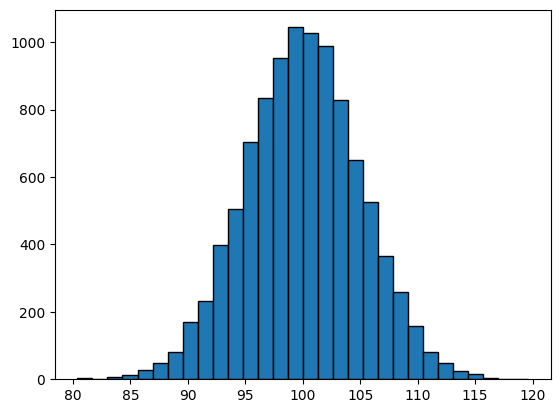

In [35]:
#plot
plt.hist(data, bins=30, edgecolor='black');

# Population statistics
Lets find out the actual population mean and standard deviation

In [36]:
population_mean = np.mean(data)
population_std = np.std(data)
print(f"Population mean: {population_mean}")
print(f"Population standard deviation: {population_std}")

Population mean: 99.98932008315786
Population standard deviation: 5.017061030649938


# Sample random points
Simulate an experiment to see what we get

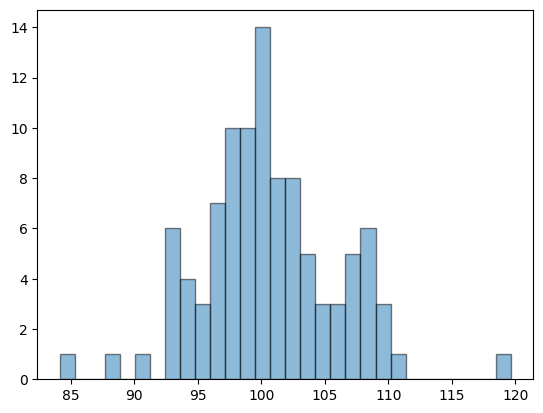

In [37]:
# Random sample
X = np.random.choice(data, 100, replace=False)

#Plot it
plt.hist(X, bins=30, edgecolor='black', alpha=0.5);

In [38]:
# Calculate sample mean and standard deviation
mean_sample = np.mean(X)
std_sample = np.std(X)
print(f'Mean: {mean_sample}, Standard deviation: {std_sample}')

Mean: 100.58393957674845, Standard deviation: 5.326239765327114


# Standard Error of the Mean SEM, or simply SE

SE = stdOfPopulation/sqrt(samples)

SE is the standard deviation of the sample means. We will actually need the std of the population for this, which is seldom known. However the std of a large sample is usually a good approximation of this. If the underlying distribution is skewed it is worse as an estimate, but will still be better with more samples.

We can use SE to create confidence intervals of a (single) sample.

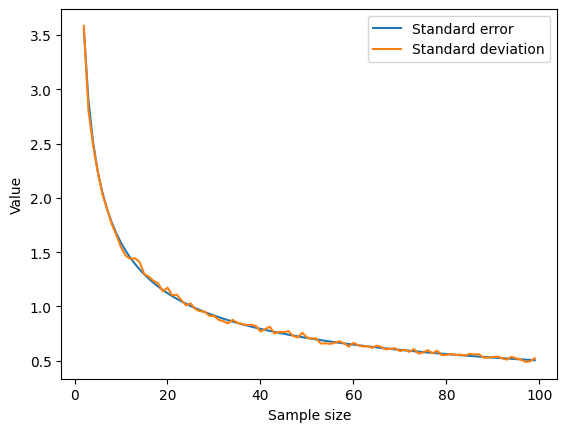

In [39]:
#Lets test how well the SE approximates the std of the sample means, for different sample sizes
max_sample_size = 100
sample_sizes = np.arange(2, max_sample_size)

n_trials = 1000
se_vector = []
std_vector = []
for sample_size in sample_sizes:

    sample_means = []

    for trial in range(n_trials):
        X = np.random.choice(data, sample_size, replace=True)
        mean_sample = np.mean(X)
        sample_means.append(mean_sample)

    std = np.std(sample_means)
    se = population_std / np.sqrt(sample_size)
    se_vector.append(se)
    std_vector.append(std)

plt.plot(sample_sizes, se_vector, label='Standard error')
plt.plot(sample_sizes, std_vector, label='Standard deviation')
plt.xlabel('Sample size')
plt.ylabel('Value')
plt.legend()
plt.show()


# Relation of sample standard deviation to the population standard deviation
It depends on the underlying distribution how well the standard deviation of the sample corresponds to the population standard deviation.


# Confidence intervals
What is the confidence interval that we are say 95% sure that the actual mean is within some range?

If we know the population standard deviation, we will use the SE together with the normal distribution that gives us 95% probability (+/- 1.96 standard deviations). However if we DON'T know the actual population standard deviation, we will instead estimate it using the sample std (now with degrees of freedom as n-1), and the t-distribution that gives us the corresponding 95% probability

In [32]:
confidence_level = 0.95
degrees_of_freedom = len(X) - 1
t_critical = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
t_critical

1.971956544249395

In [33]:
(1 + confidence_level) / 2

0.975

In [14]:
# Calculate the standard error
se = std_sample/np.sqrt(len(X))
print(f'Standard error: {se}')

# Calculate the 95% confidence interval
ci = 1.96*se
print(f'Confidence interval: {ci}')

# Calculate the confidence interval
ci_low = mean_sample - ci
ci_high = mean_sample + ci
print(f'Confidence interval: [{ci_low}, {ci_high}]')
 

Standard error: 2.7715275692807557
Confidence interval: 5.432194035790281
Confidence interval: [43.21283232368409, 54.07722039526465]


# Central limit theorem

Lets try the central limit theorem

1) The means of the samples in a set of samples will be approximately normally distributed
2) This normal distribution will have a mean close to the mean fo the population
3) The variance of the sample means will be close to the variance of the population divided by the sample size


Mean of sample means: 49.410772592318864, Standard deviation of sample means: 2.870650904366356, Standard error of the mean: 2.876157446611108
Population mean: 49.41595576842997, Population standard deviation: 28.76157446611108


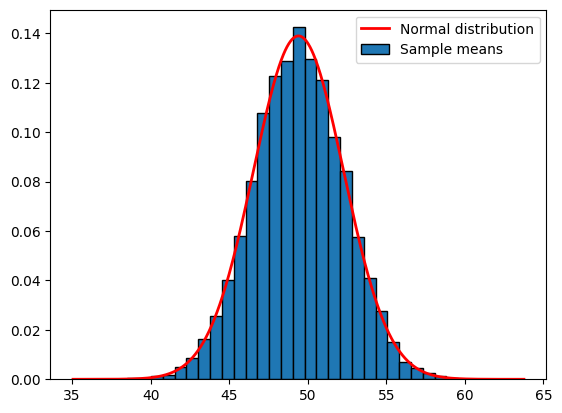

In [17]:
sample_size = 100
n_trials = 20000
sample_means = []
sample_stds = []
for trial in range(n_trials):
    X = np.random.choice(data, sample_size, replace=True)
    mean_sample = np.mean(X)
    std_sample = np.std(X)
    sample_means.append(mean_sample)
    sample_stds.append(std_sample)


means_of_samples = np.mean(sample_means)
stds_of_samples = np.std(sample_means)
se = population_std/np.sqrt(sample_size)
print(f'Mean of sample means: {means_of_samples}, Standard deviation of sample means: {stds_of_samples}, Standard error of the mean: {se}')
print(f'Population mean: {population_mean}, Population standard deviation: {population_std}')
plt.hist(sample_means, bins=30, edgecolor='black', density=True);
x_norm = np.linspace(means_of_samples-5*stds_of_samples, means_of_samples+5*stds_of_samples, 1000)
y_norm = (1/(stds_of_samples*np.sqrt(2*np.pi)))*np.exp(-0.5*((x_norm-means_of_samples)/stds_of_samples)**2)
plt.plot(x_norm, y_norm, 'r-', lw=2)

plt.legend(['Normal distribution', 'Sample means'])




In [40]:
np.mean(sample_stds)

4.981858598747152

# Test how good our confidence intervals are

If we want to have our mean within the actual population mean with 95% probability, we need to have 1.96 standard deviations.
Lets see if it works

# Lets assume we KNOW the population standard deviation

In [46]:
sample_size = 200
n_trials = 500000
num_outside_confidece_interval = 0
num_inside_confidece_interval = 0
for trial in range(n_trials):
    X = np.random.choice(data, sample_size, replace=True)
    mean_sample = np.mean(X)
    std_sample = np.std(X, ddof=1)
    #SE = std_sample/np.sqrt(sample_size)
    SE = population_std/np.sqrt(sample_size)

    # Calculate the t-distribution for a 95% confidence interval
    

    

    if np.abs(mean_sample - population_mean) > 1.96*SE: 
        # Trial is outside the confidence interval
        num_outside_confidece_interval += 1
    else:
        num_inside_confidece_interval += 1

print(f'Fraction of trials outside the confidence interval: {num_outside_confidece_interval/n_trials}')



Fraction of trials outside the confidence interval: 0.04942


# Assume we don't know the population standard deviation
We then use the std of the sample, together with the 95% point for the t-distribution

In [47]:
# Calculate the t-distribution for a 95% confidence interval
t_critical = t.ppf((1 + 0.95) / 2, sample_size - 1)
print(f'T-critical: {t_critical}')

sample_size = 200
n_trials = 500000
num_outside_confidece_interval = 0
num_inside_confidece_interval = 0
for trial in range(n_trials):
    X = np.random.choice(data, sample_size, replace=True)
    mean_sample = np.mean(X)
    std_sample = np.std(X, ddof=1)
    
    SE = std_sample/np.sqrt(sample_size)


    if np.abs(mean_sample - population_mean) > t_critical*SE: 
        # Trial is outside the confidence interval
        num_outside_confidece_interval += 1
    else:
        num_inside_confidece_interval += 1

print(f'Fraction of trials outside the confidence interval: {num_outside_confidece_interval/n_trials}')



T-critical: 1.971956544249395
Fraction of trials outside the confidence interval: 0.04966
